In [1]:
import matplotlib # импортируем библиотеку
import matplotlib.pyplot as plt # основной модуль
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

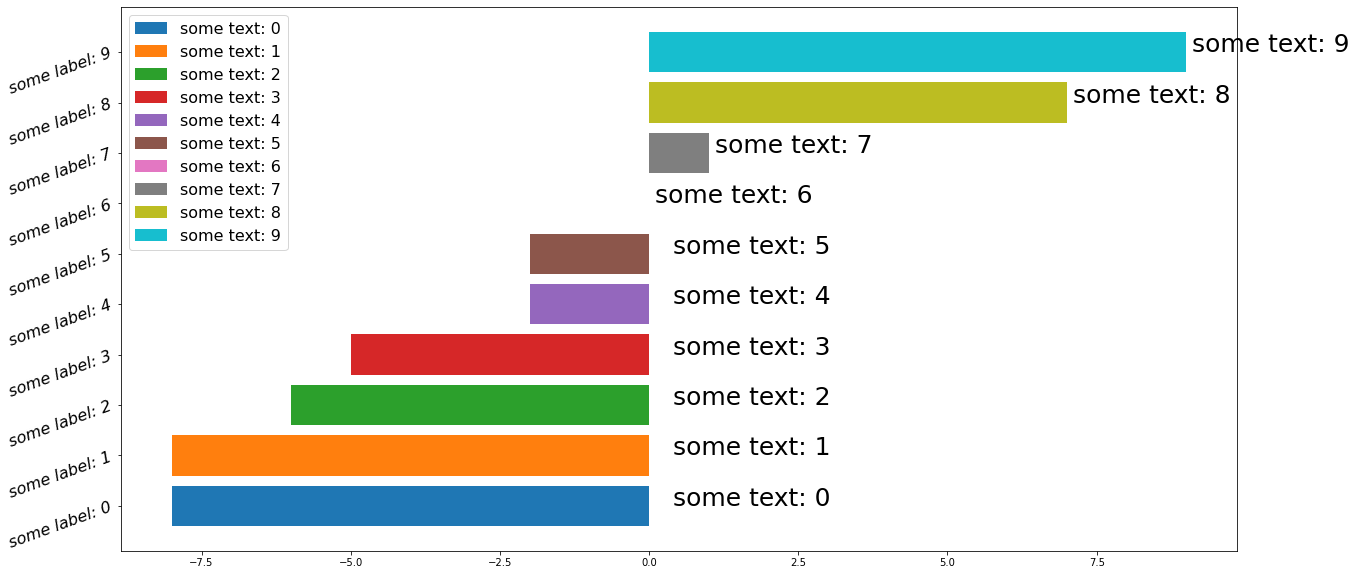

In [2]:
bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (20, 10)


def plot_horizontal_bar(bars_length, labels, yticks_labels, figsize):
    fig = plt.figure(figsize = (20,10))
    ax = fig.gca()
    for i in range(10):
        ax.barh(i, bars_length[i], label = labels[i])
        if bars_length[i] < 0:
            ax.annotate(labels[i], xy = (0,i), xytext = (0.4, i), fontsize = 25)
        else:
            ax.annotate(labels[i], xy = (0,i), xytext = (bars_length[i] + 0.1, i),fontsize = 25)
   
    ax.legend(prop = {'size':16})
    ax.set_yticks(np.arange(0,10))
    ax.set_yticklabels(yticks_labels, fontsize = 16, fontstyle = 'italic', rotation = 20)

        
plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)
    
    


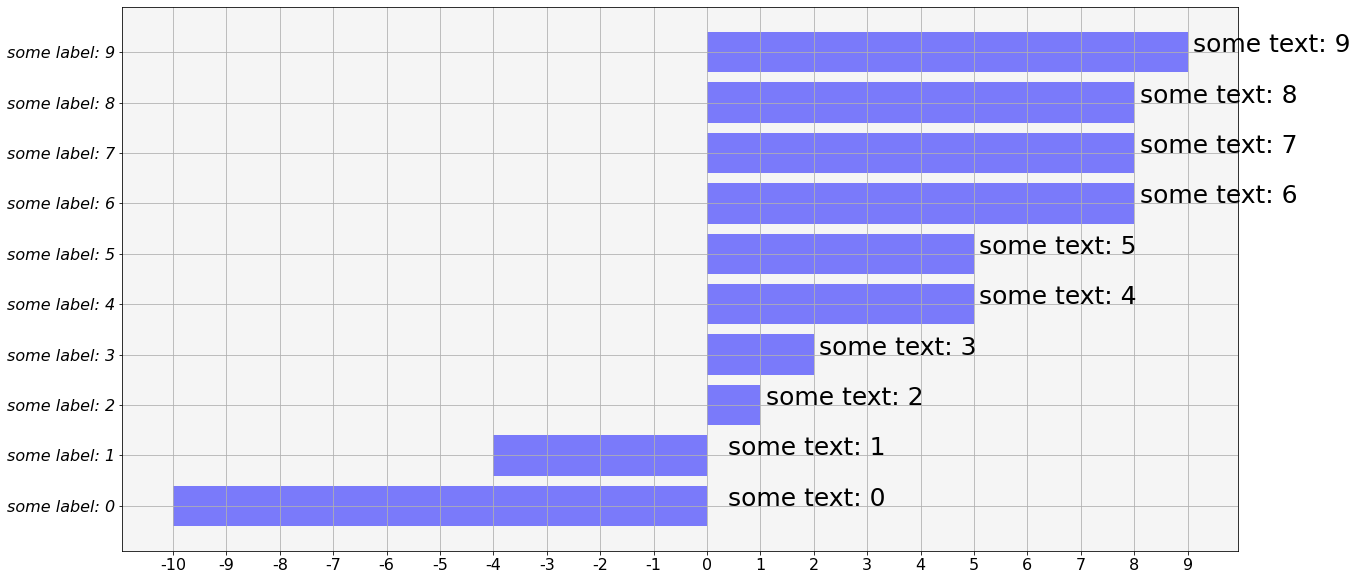

In [3]:
bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (20, 10)


def plot_horizontal_bar_1(bars_length, labels, yticks_labels, figsize):
    
    
    fig = plt.figure(figsize = (20,10))
    ax = fig.gca()
    
    
    for i in range(10):
        ax.barh(i, bars_length[i], label = labels[i], color = 'blue', alpha = 0.5)
        if bars_length[i] < 0:
            ax.annotate(labels[i], xy = (0,i), xytext = (0.4, i), fontsize = 25)
        else:
            ax.annotate(labels[i], xy = (0,i), xytext = (bars_length[i] + 0.1, i),fontsize = 25)
   

    ax.set_yticks(np.arange(0,10))
    ax.set_xticks(np.arange(np.min(bars_length),np.max(bars_length)+1))
    ax.set_xticklabels(np.arange(np.min(bars_length),np.max(bars_length) + 1),fontsize = 16)
    ax.set_yticklabels(yticks_labels, fontsize = 16, fontstyle = 'italic')
    ax.set_facecolor('whitesmoke')
    ax.grid()

        
plot_horizontal_bar_1(bars_length, labels, yticks_labels, figsize)

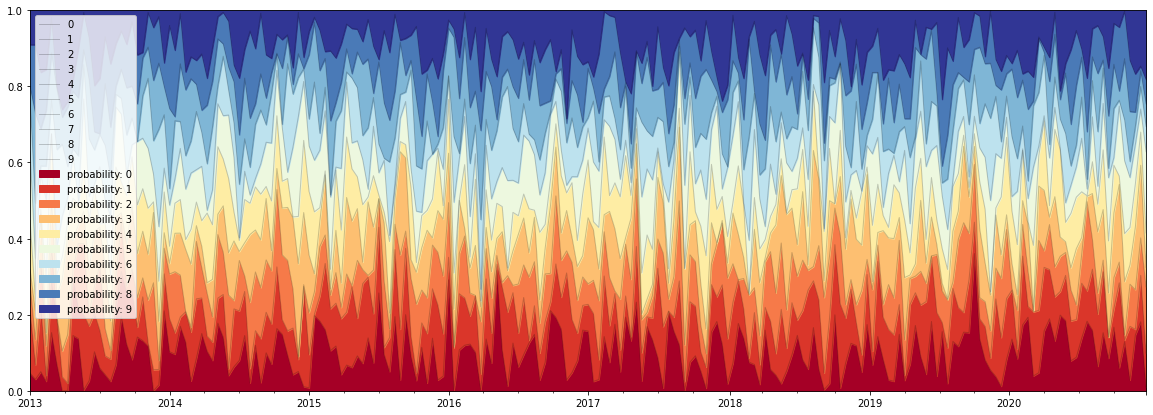

In [15]:
dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 7)

def plot_time_probabilities(probabilities_in_time, figsize):
    fig = plt.figure(figsize = figsize)
    ax = plt.gca()
    cmap  = plt.cm.RdYlBu(np.linspace(0,1,10))
    
    for i in range(10):
        if i == 0:
            probabilities_in_time[i].plot(color='black', alpha=0.2, linewidth = 1)
            ax.fill_between(probabilities_in_time.index, 0 ,probabilities_in_time[i].values, color = cmap[0], label = 'probability: 0')
            
        else: 
            probabilities_in_time[i] += probabilities_in_time[i-1]
            probabilities_in_time[i].plot(color='black', alpha=0.2, linewidth = 1)
            ax.fill_between(probabilities_in_time.index, probabilities_in_time[i].values,probabilities_in_time[i-1].values, color = cmap[i],label = 'probability: {}'.format(i))
            

    ax.legend(loc = 'upper left', fontsize = 10)
    
    ax.set_ylim(0,1)

              
plot_time_probabilities(probabilities_in_time, figsize)

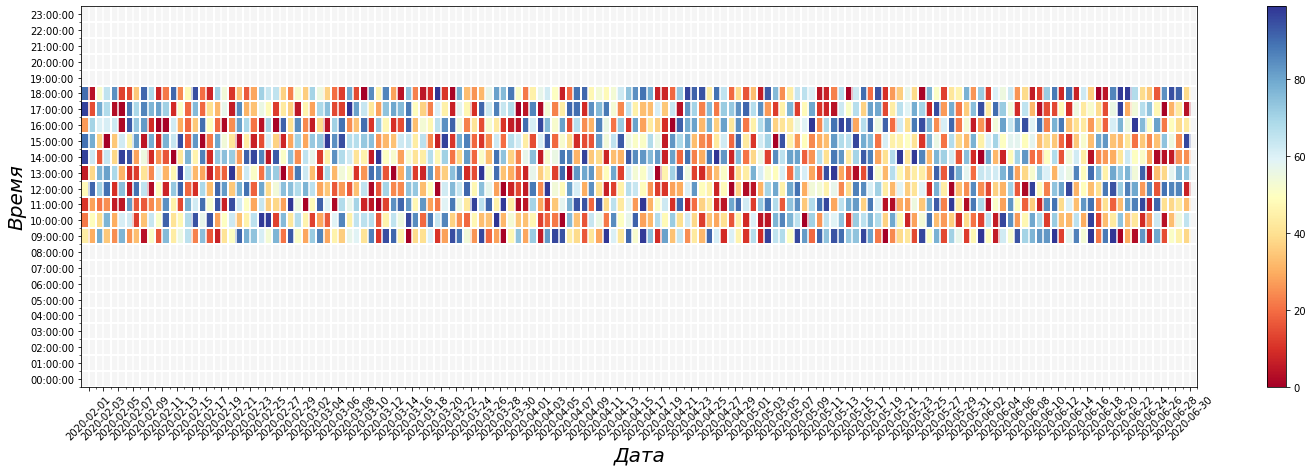

In [5]:
intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (25, 7)


def plot_intraday_ts(intraday_ts, figsize):
    
    fig = plt.figure(figsize = figsize)
    ax = plt.gca()
    
    #создаю датафрейм с введенными данными в удобном формате
    df = intraday_ts.to_frame()
    df = pd.DataFrame({'Date':intraday_ts.index.date, 'Time': intraday_ts.index.time, 'Temperature': intraday_ts.values})
    df = df.pivot(index = 'Time', columns = 'Date', values = 'Temperature')
    
    #строю тепловую карту
    plt.imshow(df, aspect = 'auto', cmap = 'RdYlBu', origin ='lower', interpolation= 'nearest' )
    
    
    #задаю подписи разбиения осей
    ax.set_xticks(np.arange(0.5, len(df.columns) + 0.5, 2))
    ax.set_yticks(np.arange(0,len(df.index)))
    ax.set_yticklabels(df.index)
    ax.set_xticklabels(df.columns[::2], rotation = 45,  fontsize = 10)
    
    # задаю решетку
    ax.grid(axis='x', color = 'white', linewidth = 1.5
           )
    
    
    # задаю минорные тиксы
    ax.set_xticks(np.arange(1.5, len(df.columns), 2), minor = True)
    ax.set_yticks(np.arange(-0.5,len(df.index)-0.5), minor = True)
    ax.grid(which = 'minor', color = 'white', linewidth = 2)
    
    #задаю цвет заднего фона
    ax.set_facecolor('whitesmoke')
    
    # Подписи осей
    ax.set_xlabel('Дата', fontsize = 20, fontstyle = 'italic')
    ax.set_ylabel('Время', fontsize = 20, fontstyle = 'italic')
    
    

    plt.colorbar()
    
    
plot_intraday_ts(intraday_ts, figsize)    
    
    